<ipython-input-13-590271f90bd6>:293: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign', 'Malware'])
E:\Users\fauzanhikmahramadhan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\Users\fauzanhikmahramadhan\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-13-590271f90bd6>", line 76, in Exit
    result = tkMessageBox.askquestion('System', 'Are you sure you want to exit?', icon="warning")
NameError: name 'tkMessageBox' is not defined


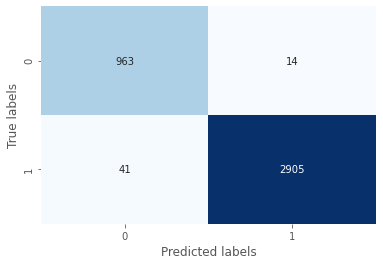

In [13]:
import sys
import tkinter
from tkinter.filedialog import askopenfilename
from tkinter import *
import sqlite3
import csv
import os
from tkinter import ttk
import time
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tkinter.messagebox as tkmessagebox
from PIL import ImageTk, Image

#========================================BAGIAN ABEL========================================================================

#=======================================METHODS=======================================

def Main():
    global root, label, USERNAME, PASSWORD, FIRSTNAME, LASTNAME
    root = Tk()
    root.title("Python: Malware Detection")


    width = 640
    height = 480
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    x = (screen_width/2) - (width/2)
    y = (screen_height/2) - (height/2)
    root.geometry("%dx%d+%d+%d" % (width, height, x, y))

    bg = Image.open(r"bgbg.png") 
    test_bg = ImageTk.PhotoImage(bg)
    label = tkinter.Label(image=test_bg)
    label.image = test_bg
    root.resizable(0, 0)

#=======================================VARIABLES=====================================
    USERNAME = StringVar()
    PASSWORD = StringVar()
    FIRSTNAME = StringVar()
    LASTNAME = StringVar()
    
#========================================HALAMAN UTAMA===============================    
    LoginForm()

#========================================MENUBAR WIDGETS===============================
    menubar = Menu(root)
    filemenu = Menu(menubar, tearoff=0)
    filemenu.add_command(label="About", command=About)
    filemenu.add_command(label="Exit", command=Exit)
    menubar.add_cascade(label="File", menu=filemenu)
    root.config(menu=menubar)
    
#========================================INITIALIZATION=======================================
    if __name__ == '__main__':
        root.mainloop()
        

def Database():
    global conn, cursor
    conn = sqlite3.connect("db_member.db")
    cursor = conn.cursor()
    cursor.execute("CREATE TABLE IF NOT EXISTS `member` (mem_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, username TEXT, password TEXT, firstname TEXT, lastname TEXT)")


def Exit():
    result = tkMessageBox.askquestion('System', 'Are you sure you want to exit?', icon="warning")
    if result == 'yes':
        root.destroy()


def LoginForm():
    global LoginFrame, lbl_result1
    LoginFrame = Frame(root)
    LoginFrame.pack(side=TOP, pady=80)
    
    label.place(x=0, y=0)
    lbl_username = Label(LoginFrame, text="Username:", font=('arial', 25), bd=18)
    lbl_username.grid(row=1)
    lbl_password = Label(LoginFrame, text="Password:", font=('arial', 25), bd=18)
    lbl_password.grid(row=2)
    lbl_result1 = Label(LoginFrame, text="", font=('arial', 18))
    lbl_result1.grid(row=3, columnspan=2)
    username = Entry(LoginFrame, font=('arial', 20), textvariable=USERNAME, width=15)
    username.grid(row=1, column=1)
    password = Entry(LoginFrame, font=('arial', 20), textvariable=PASSWORD, width=15, show="*")
    password.grid(row=2, column=1)
    btn_login = Button(LoginFrame, text="Login", font=('arial', 18), width=35, command=Login)
    btn_login.grid(row=4, columnspan=2, pady=20)
    
    lbl_text = Label(LoginFrame, text = "Do you have account?", font=('arial', 12))
    lbl_text.grid(row=5, sticky=W, column=0)
    lbl_register = Label(LoginFrame, text="No, Create an account", fg="Blue", font=('arial', 12))
    lbl_register.grid(row=5, sticky=W, column=1)
    lbl_register.bind('<Button-1>', ToggleToRegister)

def RegisterForm():
    global RegisterFrame, lbl_result2
    RegisterFrame = Frame(root)
    RegisterFrame.pack(side=TOP, pady=40)
    
    lbl_username = Label(RegisterFrame, text="Username:", font=('arial', 18), bd=18)
    lbl_username.grid(row=1)
    lbl_password = Label(RegisterFrame, text="Password:", font=('arial', 18), bd=18)
    lbl_password.grid(row=2)
    lbl_firstname = Label(RegisterFrame, text="Firstname:", font=('arial', 18), bd=18)
    lbl_firstname.grid(row=3)
    lbl_lastname = Label(RegisterFrame, text="Lastname:", font=('arial', 18), bd=18)
    lbl_lastname.grid(row=4)
    lbl_result2 = Label(RegisterFrame, text="", font=('arial', 18))
    lbl_result2.grid(row=5, columnspan=2)
    
    username = Entry(RegisterFrame, font=('arial', 20), textvariable=USERNAME, width=15)
    username.grid(row=1, column=1)
    password = Entry(RegisterFrame, font=('arial', 20), textvariable=PASSWORD, width=15, show="*")
    password.grid(row=2, column=1)
    firstname = Entry(RegisterFrame, font=('arial', 20), textvariable=FIRSTNAME, width=15)
    firstname.grid(row=3, column=1)
    lastname = Entry(RegisterFrame, font=('arial', 20), textvariable=LASTNAME, width=15)
    lastname.grid(row=4, column=1)
    btn_login = Button(RegisterFrame, text="Register", font=('arial', 18), width=35, command=Register)
    btn_login.grid(row=6, columnspan=2, pady=20)
    
    lbl_text = Label(RegisterFrame, text="Do you have account?", font=('arial', 12))
    lbl_text.grid(row=7, sticky=W, column= 0)
    lbl_login = Label(RegisterFrame, text="Yes, I have", fg="Blue", font=('arial', 12))
    lbl_login.grid(row=7, sticky=W, column= 1)
    lbl_login.bind('<Button-1>', ToggleToLogin)

def ToggleToLogin(event=None):
    RegisterFrame.destroy()
    LoginForm()

def ToggleToRegister(event=None):
    LoginFrame.destroy()
    RegisterForm()
    
def ToggleToMachine(event=None):
    LoginFrame.destroy()
    Machine()

def ToggleLogout(event=None):
    gui.destroy()
    Main()

def ToggleBack(event=None):
    win.destroy()
    Main()


def Register():
    Database()
    if USERNAME.get == "" or PASSWORD.get() == "" or FIRSTNAME.get() == "" or LASTNAME.get == "":
        lbl_result2.config(text="Please complete the required field!", fg="orange")
    else:
        cursor.execute("SELECT * FROM `member` WHERE `username` = ?", (USERNAME.get(),))
        if cursor.fetchone() is not None:
            lbl_result2.config(text="Username is already taken", fg="red")
        else:
            cursor.execute("INSERT INTO `member` (username, password, firstname, lastname) VALUES(?, ?, ?, ?)", (str(USERNAME.get()), str(PASSWORD.get()), str(FIRSTNAME.get()), str(LASTNAME.get())))
            conn.commit()
            USERNAME.set("")
            PASSWORD.set("")
            FIRSTNAME.set("")
            LASTNAME.set("")
            lbl_result2.config(text="Successfully Created!", fg="black")
        cursor.close()
        conn.close()
def Login():
    Database()
    if USERNAME.get == "" or PASSWORD.get() == "":
        lbl_result1.config(text="Please complete the required field!", fg="orange")
    else:
        cursor.execute("SELECT * FROM `member` WHERE `username` = ? and `password` = ?", (USERNAME.get(), PASSWORD.get()))
        if cursor.fetchone() is not None:
            lbl_result1.config(text="You Successfully Login", fg="blue")
            ToggleToMachine()
        else:
            lbl_result1.config(text="Invalid Username or password", fg="red")

#========================================BAGIAN FAUZAN=====================================================================
            
def Machine():
    root.destroy()
    
    global gui, e1, file, file_box, hasil_box
    
    gui = Tk()
    width_value = gui.winfo_screenwidth()
    height_value = gui.winfo_screenheight()
    
    menubar = Menu(gui)
    filemenu = Menu(menubar, tearoff=0)
    filemenu.add_command(label="Logout", command=ToggleLogout)
    filemenu.add_command(label="Exit", command=Exit)
    menubar.add_cascade(label="File", menu=filemenu)
    gui.config(menu=menubar)

    bg = Image.open(r"malware.png") 
    bg = bg.resize((width_value,height_value), Image.ANTIALIAS)
    test_bg = ImageTk.PhotoImage(bg)
    label = Label(image=test_bg, width=width_value, height=height_value)
    label.image = test_bg
    label.place(x=0, y=0)

    gui.title('Machine Learning GUI')
    gui.geometry('{}x{}+0+0'.format(width_value,height_value))
    gui.rowconfigure([0,1,2,3,4,5], weight=0)
    
    # INPUT DATAFRAME
    l1=Label(gui, text='Select Data File')
    l1.grid(row=0, column=0, sticky='E', pady=20, padx=10)

    
    e1 = Entry(gui,text='')
    e1.grid(row=0, column=1, sticky='W', ipadx=100)

    Button(gui,text='open', command=data).grid(row=0, column=2, sticky="W", ipadx=10)

    # TAMPILAN DATAFRAME
    file_box = LabelFrame(gui,text="dataframe") 
    file_box.grid(ipadx=350, ipady=300, padx=10, row=1, columnspan=3)
    file = ttk.Treeview(file_box)
    file.place(relheight=1, relwidth=1)
    filescrolly = Scrollbar(file_box, orient="vertical", command=file.yview)
    filescrollx = Scrollbar(file_box, orient="horizontal", command=file.xview)
    file.configure(xscrollcommand=filescrollx.set, yscrollcommand=filescrolly.set)
    filescrollx.pack(side='bottom', fill='x')
    filescrolly.pack(side='right', fill='y')

    # PROGRESS BAR
    progress_bar = ttk.Progressbar(orient = 'horizontal', length=765, mode='determinate')
    progress_bar.grid(row=2, columnspan=3, pady = 10)

    # BUTTON PROSES
    proses = Button(gui, text='Proses', command=ML)
    proses.grid(row=3, columnspan=3, ipadx=20)

    # TAMPILAN HASIL PROSES MACHINE LEARNING
    hasil_box = LabelFrame(gui,text="Hasil") 
    hasil_box.grid(ipadx=500, ipady=400, row=0, column=3, rowspan=10, sticky='NSEW')
    hasil_box.rowconfigure(0, weight=0)
    hasil_box.rowconfigure(1, weight=0)

    gui.mainloop()
    
def data(): # Upload File Data CSV ke Tkinter
    global filename
    filename = askopenfilename(initialdir='C:\\',title = "Select file")
    e1.delete(0, END)
    e1.insert(0, filename)
    #e1.config(text=filename)
    #print(filename)
    global df
    global used_data
    try:
        df = pd.read_csv(filename)
        used_data = df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)
    except ValueError:
        tkmessagebox.showerror("Information", "Format file yang dimasukkan salah!")
        return None
    except FileNotFoundError:
        tkmessagebox.showerror("Information", "Tidak ada file seperti {}".format(filename))
        return None
    clear_data()
    file['column'] = list(used_data.columns)
    file['show'] = "headings"
    for column in file['columns']:
        file.heading(column, text=column)
    df_rows = used_data.to_numpy().tolist()
    for row in df_rows:
        file.insert("", "end", values=row)
    return None
    
    
def clear_data():
    file.delete(*file.get_children())

def ML():
    l2=Label(hasil_box, text='Pembagian Data:')
    l2.grid(row=0, column=0, sticky='ns', pady=20, padx=10)
    f = Figure(figsize=(10,4), dpi=70)
    ax = f.subplots()
    ax.set_xticklabels(['Benign', 'Malware'])
    sns.countplot(df['Malware'], ax=ax)
    canvas = FigureCanvasTkAgg(f, master=hasil_box)
    canvas.draw()
    canvas.get_tk_widget().grid(row=0, column=1, sticky='n', rowspan=4)
#     toolbar = NavigationToolbar2Tk(canvas,gui)
#     canvas._tkcanvas.grid(column=3, row=1)
    X_train, X_test, y_train, y_test = train_test_split(used_data, df['Malware'], test_size=0.2, random_state=0)
    rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malware'])
#     l3=Label(hasil_box, textvariable=report)
#     l3.grid(row=1, column=0, sticky='w', pady=20, padx=10)
    score = str('{:.2f}'.format(accuracy_score(y_test,y_pred)*100)) + " %"
    var = StringVar()
    var.set(score)
    l5=Label(hasil_box, text='Confusion Matrix Data: ')
    l5.grid(row=6, column=0, sticky='ns', pady=20, padx=10)
    f2 = Figure(figsize=(10,4), dpi=70)
    ax2 = f2.subplots()
    ax2=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('True labels')
    canvas2 = FigureCanvasTkAgg(f2, master=hasil_box)
    canvas2.draw()
    canvas2.get_tk_widget().grid(row=6, column=1, sticky='ns', rowspan=4, pady=10)
    l3=Label(hasil_box, text='Hasil Akurasi Random Forest: ')
    l3.grid(row=10, column=0, sticky='w', pady=20, padx=10)
    l4=Label(hasil_box, textvariable=var)
    l4.grid(row=10, column=1, sticky='w', pady=20, padx=10)
    
#========================================BAGIAN RUBEN======================================================================
def About():
    
    root.destroy()
    
    #Create an instance of tkinter frame
    global win
    win = Tk()
    
    #Set the geometry of tkinter frame
    width = 1024
    height = 768
    screen_width = win.winfo_screenwidth()
    screen_height = win.winfo_screenheight()
    x = (screen_width/2) - (width/2)
    y = (screen_height/2) - (height/2)
    win.geometry("%dx%d+%d+%d" % (width, height, x, y))

    menubar = Menu(win)
    filemenu = Menu(menubar, tearoff=0)
    filemenu.add_command(label="Login", command=ToggleBack)
    filemenu.add_command(label="Exit", command=Exit)
    menubar.add_cascade(label="File", menu=filemenu)
    win.config(menu=menubar)

    #Create a canvas
    canvas= Canvas(win, width= 1024, height= 768)
    canvas.pack()

    #Load an image in the script
    img= (Image.open("MAlware detection.png"))

    #Resize the Image using resize method
    resized_image= img.resize((1024,768), Image.ANTIALIAS)
    new_image= ImageTk.PhotoImage(resized_image)

    #Add image to the Canvas Items
    canvas.create_image(10,10, anchor=NW, image=new_image)

    win.mainloop()




#========================================MENJALANKAN PROGRAM==================================
Main()
   


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_csv('dataset_malwares.csv')

In [5]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

E:\Users\fauzanhikmahramadhan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


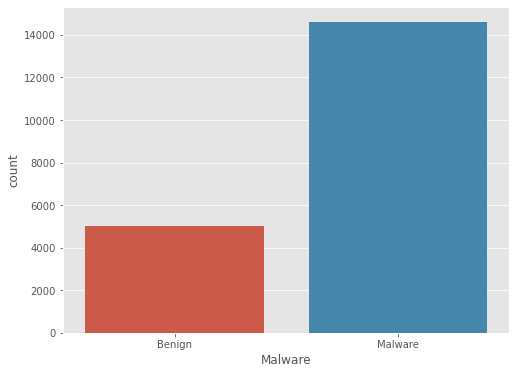

In [7]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)

In [9]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [10]:
y_pred = rfc.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



Text(33.0, 0.5, 'True labels')

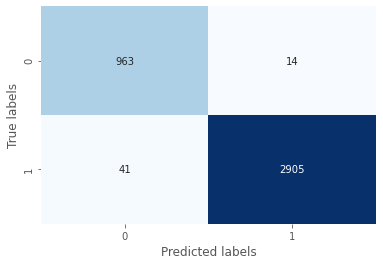

In [12]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')